In [1]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import os

In [2]:
#Source - https://covidtracking.com/data

#Get Covid data for all of U.S.
json_url = "https://api.covidtracking.com/v1/states/daily.json"

#Create dictionary to read from
us_daily_dict = requests.get(json_url).json()

In [3]:
#Create data frame from dictionary
us_daily = pd.DataFrame(us_daily_dict)
us_daily.head(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200829,AK,6035.0,339660.0,NaN,43.0,NaN,NaN,NaN,7.0,...,345695,0,0,d14280fc719ed7f9365e0e046b0ac9ffd9a0b06b,0,0,0,0,0,
1,20200829,AL,123889.0,851929.0,NaN,986.0,14267.0,NaN,1459.0,NaN,...,975818,45,0,668b17e7da32941aa4a95ef2775527e9e7d5d7a7,0,0,0,0,0,
2,20200829,AR,60378.0,646592.0,NaN,407.0,4142.0,NaN,NaN,95.0,...,706970,16,0,19baf0f83cf44094d1194521bfebecbcdeaf6961,0,0,0,0,0,
3,20200829,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1514,0,0,e063eb477b842be4d1532f74fc5371dd23ec577d,0,0,0,0,0,
4,20200829,AZ,201287.0,991089.0,NaN,812.0,21433.0,262.0,NaN,164.0,...,1192376,29,5,d6aca9f355470d3f2ed666030c62bc76e880d557,0,0,0,0,0,


# Filter Kansas and New Jersey

In [4]:
#Filter Kansas and New Jersey
ks_nj_daily = pd.DataFrame(us_daily[["date", "state", "positive", "negative", "positiveIncrease", "negativeIncrease", "death", "deathIncrease", 
                  "totalTestResultsIncrease", "totalTestResults", "recovered"]])
ks_nj_daily = ks_nj_daily.loc[(ks_nj_daily["state"] == "KS") | (ks_nj_daily["state"] == "NJ") ]

In [5]:
#Add percentage column
ks_nj_daily["Percentage"] = ks_nj_daily["positiveIncrease"]/ks_nj_daily["totalTestResultsIncrease"]

#Add active cases column
ks_nj_daily["Active Cases"] = ""

for row in ks_nj_daily.iterrows():
    ks_nj_daily["Active Cases"] = ks_nj_daily["positive"] - ks_nj_daily["recovered"]

#Fill NaN fields to be zero for readability
ks_nj_daily[["Percentage", "death", "recovered", "Active Cases", "positive", "negative"]] = ks_nj_daily[["Percentage", "death", "recovered", "Active Cases", "positive", "negative"]].fillna(0)
ks_nj_daily["Percentage"] = ks_nj_daily["Percentage"].astype(float).map("{:.2%}".format)
#ks_nj_daily = ks_nj_daily.set_index("date")

#Write to csv file
ks_nj_daily.to_csv('Resources/ks_nj_daily.csv')
ks_nj_daily.head(5)

,date,state,positive,negative,positiveIncrease,negativeIncrease,death,deathIncrease,totalTestResultsIncrease,totalTestResults,recovered,Percentage,Active Cases
18,20200829,KS,41048.0,362099.0,0,0,443.0,0,0,403147.0,1658.0,0.00%,39390.0
34,20200829,NJ,191320.0,2616427.0,349,58204,15933.0,3,58553,2807747.0,33827.0,0.60%,157493.0
74,20200828,KS,41048.0,362099.0,1111,6939,443.0,6,8050,403147.0,1658.0,13.80%,39390.0
90,20200828,NJ,190971.0,2558223.0,358,0,15930.0,9,358,2749194.0,33778.0,100.00%,157193.0
130,20200827,KS,39937.0,355160.0,0,0,437.0,0,0,395097.0,1624.0,0.00%,38313.0


# Filter and Separate Kansas & New Jersey by Month

In [6]:
#Filter for March data
ks_march = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200301) & (ks_nj_daily["date"] <= 20200331) & (ks_nj_daily["state"] == "KS") ,:]
nj_march = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200301) & (ks_nj_daily["date"] <= 20200331) & (ks_nj_daily["state"] == "NJ") ,:]
nj_march = nj_march.loc[(nj_march["positive"] > 0),:]

In [7]:
#Sort values for charting
ks_march = ks_march.sort_values("date", ascending = True)
nj_march = nj_march.sort_values("date", ascending = True)

In [8]:
#Filter April data
ks_april = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200401) & (ks_nj_daily["date"] <= 20200430) & (ks_nj_daily["state"] == "KS") ,:]
nj_april = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200401) & (ks_nj_daily["date"] <= 20200430) & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_april = ks_april.sort_values("date", ascending = True)
nj_april = nj_april.sort_values("date", ascending = True)

In [9]:
#Filter May data
ks_may = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200501) & (ks_nj_daily["date"] <= 20200531) & (ks_nj_daily["state"] == "KS") ,:]
nj_may = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200501) & (ks_nj_daily["date"] <= 20200531) & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_may = ks_may.sort_values("date", ascending = True)
nj_may = nj_may.sort_values("date", ascending = True)

In [10]:
#Filter June data
ks_june = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200601) & (ks_nj_daily["date"] <= 20200630) & (ks_nj_daily["state"] == "KS") ,:]
nj_june = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200601) & (ks_nj_daily["date"] <= 20200630) & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_june = ks_june.sort_values("date", ascending = True)
nj_june = nj_june.sort_values("date", ascending = True)

In [11]:
#Filter July data
ks_july = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200701) & (ks_nj_daily["date"] <= 20200731) & (ks_nj_daily["state"] == "KS") ,:]
nj_july = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200701) & (ks_nj_daily["date"] <= 20200731) & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_july = ks_july.sort_values("date", ascending = True)
nj_july = nj_july.sort_values("date", ascending = True)

In [12]:
#Filter August data
ks_aug = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200801) & (ks_nj_daily["date"] <= 20200831) & (ks_nj_daily["state"] == "KS") ,:]
nj_aug = ks_nj_daily.loc[(ks_nj_daily["date"] >= 20200801) & (ks_nj_daily["date"] <= 20200831) & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_aug = ks_aug.sort_values("date", ascending = True)
nj_aug = nj_aug.sort_values("date", ascending = True)

# Plot Cumulative Case Total by Month for Kansas

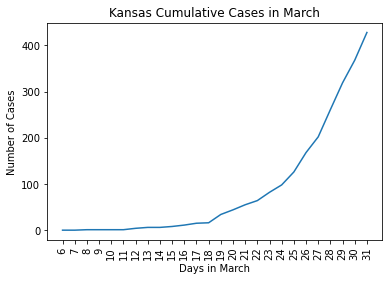

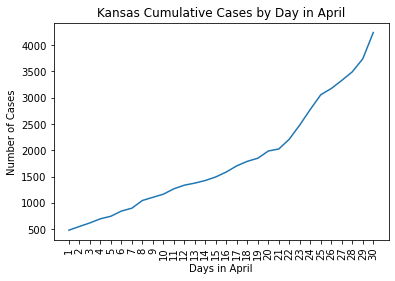

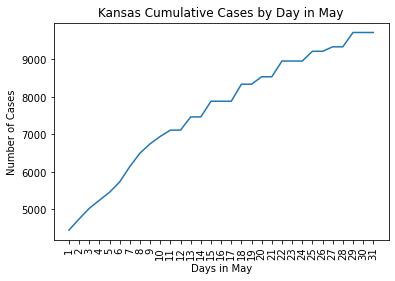

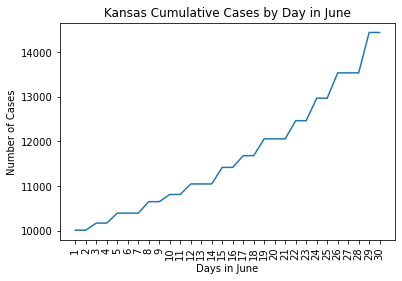

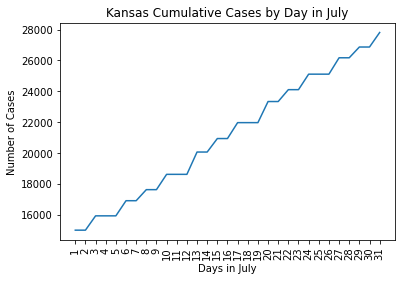

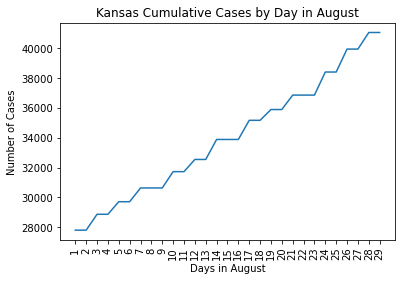

In [13]:
#Plot March data for Kansas
march_ks = plt.figure(1)
ks_date = np.arange(6,32)
ks_march_cases = ks_march["positive"]

plt.plot(ks_date, ks_march_cases)
plt.xticks(np.arange(min(ks_date), max(ks_date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases in March")
plt.savefig("Images/Cumulative/ks_march_graph.png")

april_ks = plt.figure(2)
date = np.arange(1,31)
ks_april_cases = ks_april["positive"]

plt.plot(date, ks_april_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in April")
plt.savefig("Images/Cumulative/ks_april_graph.png")

#Plot May data for Kansas   
may_ks = plt.figure(3)
date = np.arange(1,32)
ks_may_cases = ks_may["positive"]

plt.plot(date, ks_may_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in May")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in May")  
plt.savefig("Images/Cumulative/ks_may_graph.png")

#Plot June data for Kansas   
june_ks = plt.figure(4)
date = np.arange(1,31)
ks_june_cases = ks_june["positive"]

plt.plot(date, ks_june_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in June")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in June")  
plt.savefig("Images/Cumulative/ks_june_graph.png")

#Plot July data for Kansas   
july_ks = plt.figure(5)
date = np.arange(1,32)
ks_july_cases = ks_july["positive"]

plt.plot(date, ks_july_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in July")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in July")  
plt.savefig("Images/Cumulative/ks_july_graph.png")

#Plot August data for Kansas   
aug_ks = plt.figure(6)
date = np.arange(1,30)
ks_aug_cases = ks_aug["positive"]

plt.plot(date, ks_aug_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in August")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in August")  
plt.savefig("Images/Cumulative/ks_aug_graph.png")

plt.show()

# Plot Cumulative Case Total by Month for New Jersey

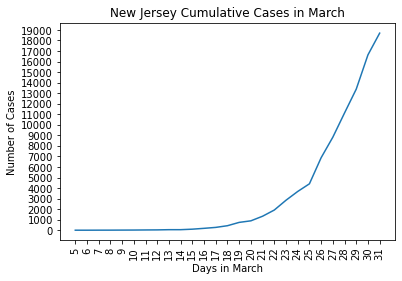

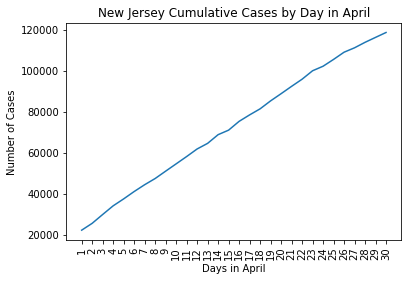

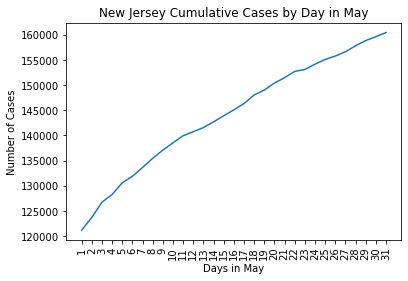

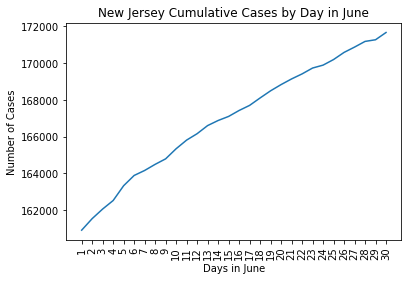

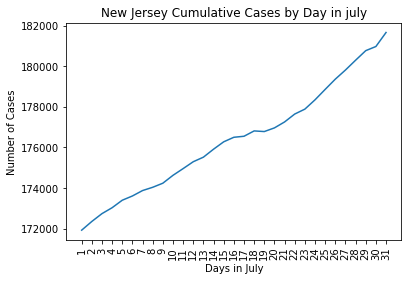

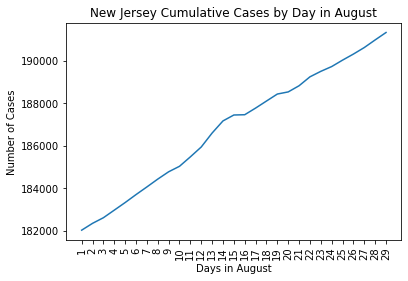

In [14]:
#Plot March data for New Jersey
march_nj = plt.figure(1)
nj_date = np.arange(5,32)
nj_march_cases = nj_march["positive"]

plt.plot(nj_date, nj_march_cases)
plt.xticks(np.arange(min(nj_date), max(nj_date)+1, 1.0), rotation = "vertical")
plt.yticks(np.arange(min(nj_march_cases)-1, max(nj_march_cases)+1000, 1000.0))
plt.ylim(None, max(nj_march_cases)+1000)
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases in March")
plt.savefig("Images/Cumulative/nj_march_graph.png")

#Plot April data for New Jersey
april_nj = plt.figure(2)
date = np.arange(1,31)
nj_april_cases = nj_april["positive"]

plt.plot(date, nj_april_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in April")
plt.savefig("Images/Cumulative/nj_april_graph.png")

#Plot May data for New Jersey   
may_nj = plt.figure(3)
date = np.arange(1,32)
nj_may_cases = nj_may["positive"]

plt.plot(date, nj_may_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in May")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in May")  
plt.savefig("Images/Cumulative/nj_may_graph.png")

#Plot June data for New Jersey   
june_nj = plt.figure(4)
date = np.arange(1,31)
nj_june_cases = nj_june["positive"]

plt.plot(date, nj_june_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in June")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in June")  
plt.savefig("Images/Cumulative/nj_june_graph.png")

#Plot July data for New Jersey   
july_nj = plt.figure(5)
date = np.arange(1,32)
nj_july_cases = nj_july["positive"]

plt.plot(date, nj_july_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in July")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in july")  
plt.savefig("Images/Cumulative/nj_july_graph.png")

#Plot August data for New Jersey   
aug_nj = plt.figure(6)
date = np.arange(1,30)
nj_aug_cases = nj_aug["positive"]

plt.plot(date, nj_aug_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in August")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in August")  
plt.savefig("Images/Cumulative/nj_aug_graph.png")

plt.show()

# Plot Daily Case Increase by Month for Kansas

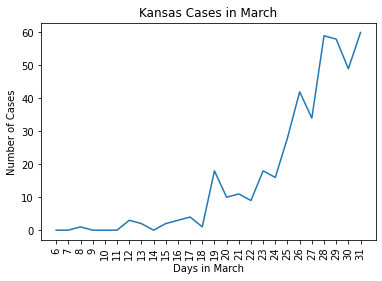

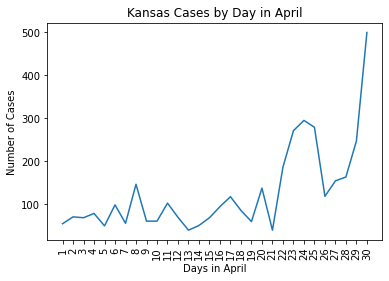

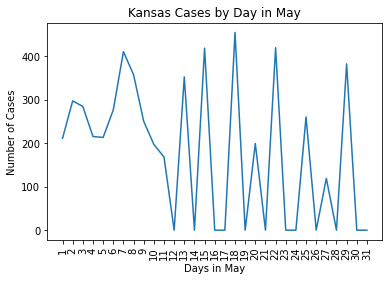

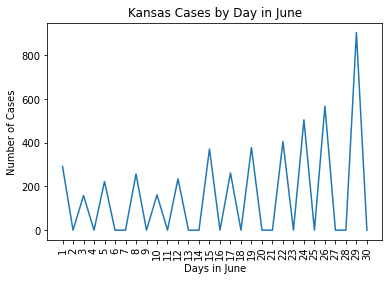

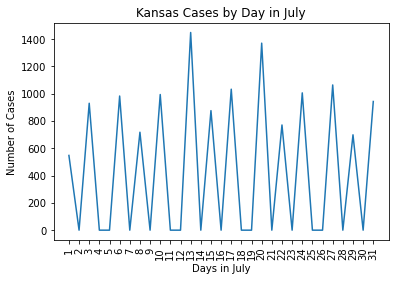

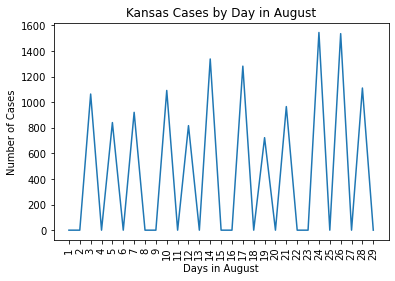

In [15]:
#Plot March data for Kansas
march_ks = plt.figure(1)
ks_date = np.arange(6,32)
ks_daily_march = ks_march["positiveIncrease"]

plt.plot(ks_date, ks_daily_march)
plt.xticks(np.arange(min(ks_date), max(ks_date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("Kansas Cases in March")
plt.savefig("Images/Daily/ks_march_graph.png")

april_ks = plt.figure(2)
date = np.arange(1,31)
ks_daily_april = ks_april["positiveIncrease"]

plt.plot(date, ks_daily_april)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("Kansas Cases by Day in April")
plt.savefig("Images/Daily/ks_april_graph.png")

#Plot May data for Kansas   
may_ks = plt.figure(3)
date = np.arange(1,32)
ks_daily_may = ks_may["positiveIncrease"]

plt.plot(date, ks_daily_may)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in May")
plt.ylabel("Number of Cases")
plt.title("Kansas Cases by Day in May")  
plt.savefig("Images/Daily/ks_may_graph.png")

#Plot June data for Kansas   
june_ks = plt.figure(4)
date = np.arange(1,31)
ks_daily_june = ks_june["positiveIncrease"]

plt.plot(date, ks_daily_june)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in June")
plt.ylabel("Number of Cases")
plt.title("Kansas Cases by Day in June")  
plt.savefig("Images/Daily/ks_june_graph.png")

#Plot July data for Kansas   
july_ks = plt.figure(5)
date = np.arange(1,32)
ks_daily_july = ks_july["positiveIncrease"]

plt.plot(date, ks_daily_july)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in July")
plt.ylabel("Number of Cases")
plt.title("Kansas Cases by Day in July")  
plt.savefig("Images/Daily/ks_july_graph.png")

#Plot August data for Kansas   
aug_ks = plt.figure(6)
date = np.arange(1,30)
ks_daily_aug = ks_aug["positiveIncrease"]

plt.plot(date, ks_daily_aug)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in August")
plt.ylabel("Number of Cases")
plt.title("Kansas Cases by Day in August")  
plt.savefig("Images/Daily/ks_aug_graph.png")

plt.show()

# Plot Daily Case Increase by Month for New Jersey

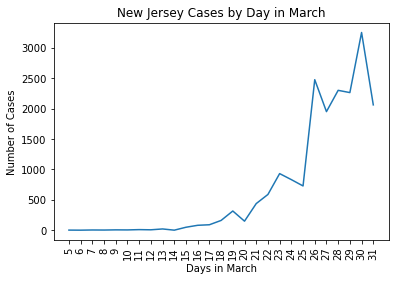

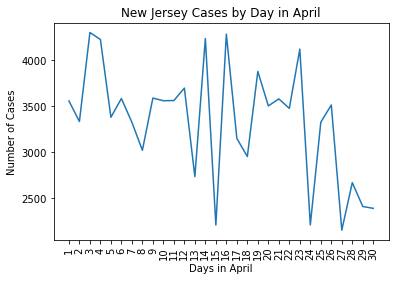

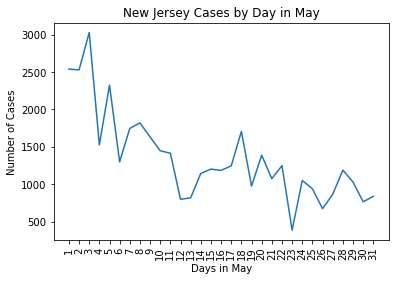

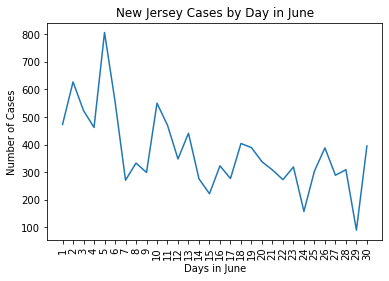

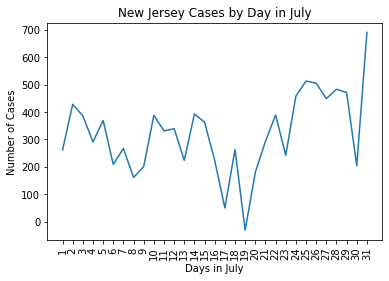

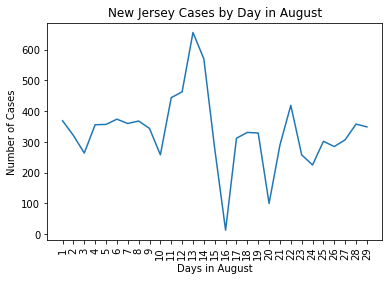

In [16]:
#Plot March data for New Jersey
march_nj = plt.figure(1)
nj_date = np.arange(5,32)
nj_daily_march = nj_march["positiveIncrease"]

plt.plot(nj_date, nj_daily_march)
plt.xticks(np.arange(min(nj_date), max(nj_date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cases by Day in March")
plt.savefig("Images/Daily/nj_march_graph.png")

april_nj = plt.figure(2)
date = np.arange(1,31)
nj_daily_april = nj_april["positiveIncrease"]

plt.plot(date, nj_daily_april)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cases by Day in April")
plt.savefig("Images/Daily/nj_april_graph.png")

#Plot May data for New Jersey   
may_nj = plt.figure(3)
date = np.arange(1,32)
nj_daily_may = nj_may["positiveIncrease"]

plt.plot(date, nj_daily_may)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in May")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cases by Day in May")  
plt.savefig("Images/Daily/nj_may_graph.png")

#Plot June data for New Jersey   
june_nj = plt.figure(4)
date = np.arange(1,31)
nj_daily_june = nj_june["positiveIncrease"]

plt.plot(date, nj_daily_june)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in June")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cases by Day in June")  
plt.savefig("Images/Daily/nj_june_graph.png")

#Plot July data for New Jersey   
july_nj = plt.figure(5)
date = np.arange(1,32)
nj_daily_july = nj_july["positiveIncrease"]

plt.plot(date, nj_daily_july)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in July")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cases by Day in July")  
plt.savefig("Images/Daily/nj_july_graph.png")

#Plot August data for New Jersey   
aug_nj = plt.figure(6)
date = np.arange(1,30)
nj_daily_aug = nj_aug["positiveIncrease"]

plt.plot(date, nj_daily_aug)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in August")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cases by Day in August")  
plt.savefig("Images/Daily/nj_aug_graph.png")

plt.show()